# Part 1: London’s underground resilience

# I.- Topological network

## I.1.- Centrality Measures

In [1]:
# libraries
from operator import itemgetter
from IPython.display import display_html
from math import sqrt

import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import folium
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
G = nx.read_graphml("london.graph.xml")
print(G)
# get 'node' attributes
list(G.nodes(data=True))[0]

Graph with 401 nodes and 467 edges


('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [3]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [4]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

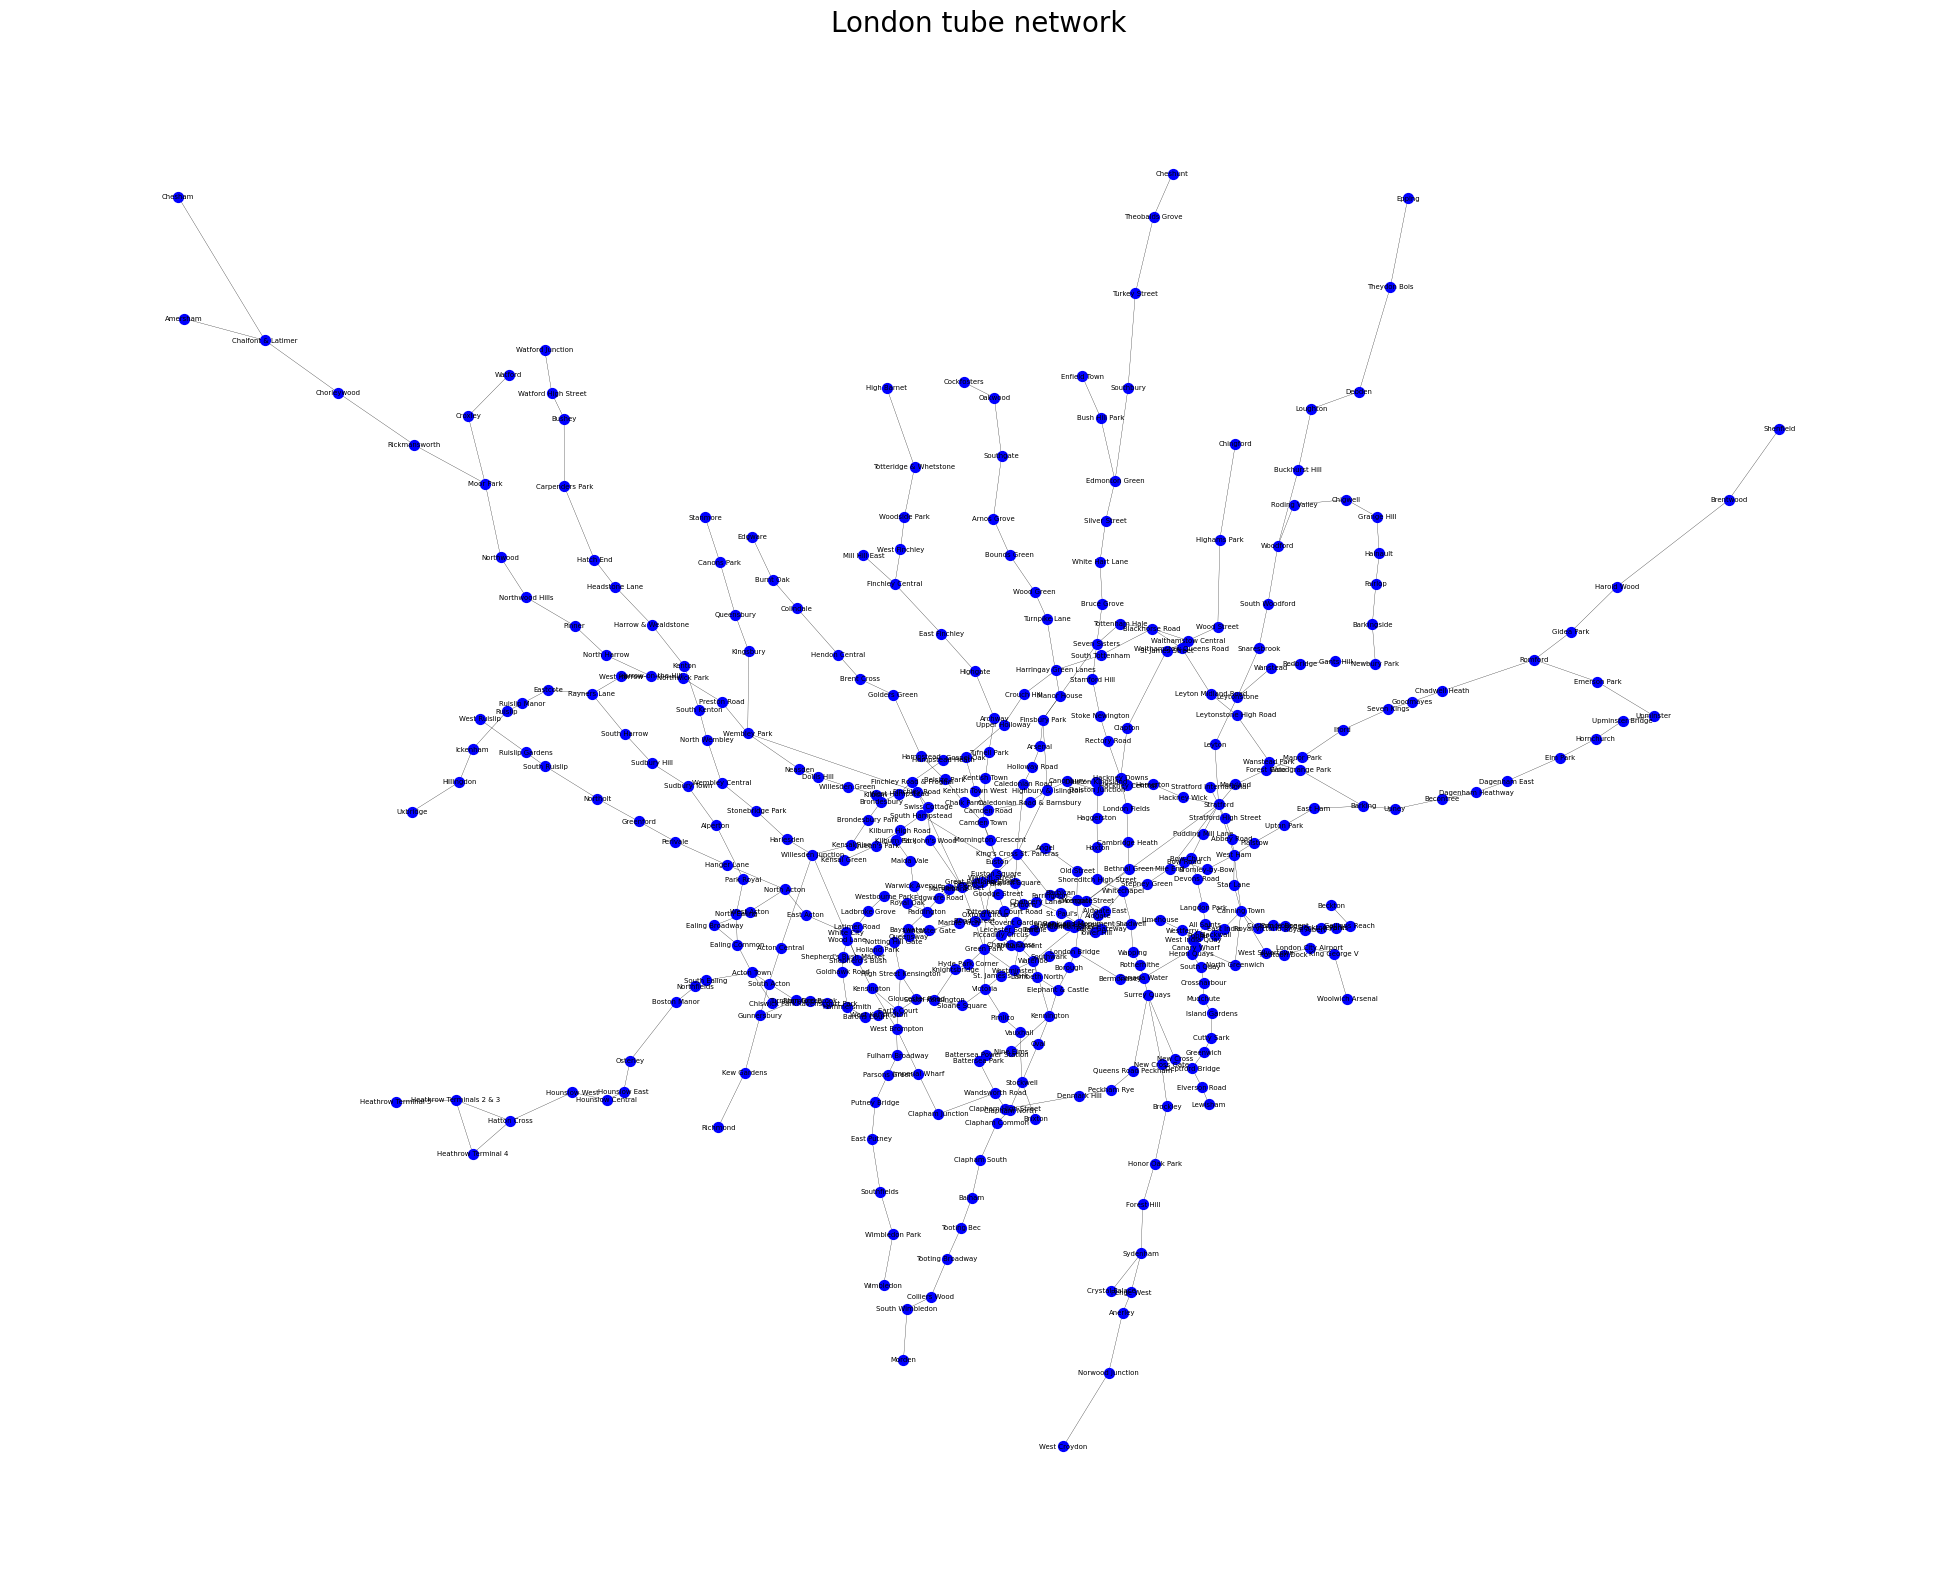

In [5]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = {node:node for node in G.nodes()}

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=5, font_color='black')

plt.title("London tube network",fontsize=20)
plt.axis("off")
plt.show()

## Degree Centrality

In [6]:
#Degree centrality add to the nodes
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:15]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


In [7]:
nq_degree_nodes = df_sorted.head(10)

# 将前10个节点保存到一个变量中
nq_degree_nodes = nq_degree_nodes.index.tolist()

# 打印前10个节点的列表，确认已保存
nq_degree_nodes

['Stratford',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Baker Street',
 "Earl's Court",
 'Oxford Circus',
 'Liverpool Street',
 'Waterloo',
 'Green Park',
 'Canning Town']

## Topological Betweeness Centrality

In [8]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


In [9]:
nq_betw_nodes = df_sorted.head(10)

# 将前10个节点保存到一个变量中
nq_betw_nodes = nq_betw_nodes.index.tolist()

# 打印前10个节点的列表，确认已保存
nq_betw_nodes

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

## Topological Closeness Centrality

In [10]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:15]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


In [11]:
nq_clo_nodes = df_sorted.head(10)

# 将前10个节点保存到一个变量中
nq_clo_nodes = nq_clo_nodes.index.tolist()

# 打印前10个节点的列表，确认已保存
nq_clo_nodes

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Farringdon',
 'Angel',
 'Moorgate']

## 1.2 Impact Measures

### Average Shortest Path Length

### Global Efficiency

## 1.3 Node Removal Analysis

#### *Non-Sequential Removal*

In [12]:
results_A = []

for cent, nodes in [('degree', nq_degree_nodes), ('betweenness_t', nq_betw_nodes), ('closeness_t', nq_clo_nodes)]:
    print(f"Removing nodes by {cent} centrality:")
    G_new = G.copy()
    
    for i in range(10):
        node_to_remove = nodes[i]
        G_new.remove_node(node_to_remove)
        largest_cc = max(nx.connected_components(G_new), key=len)
        #subgraph = G_new.subgraph(largest_cc)
        #aspl = nx.average_shortest_path_length(subgraph)
        ge = nx.global_efficiency(G_new)
        #print(f"Removed node {node_to_remove}, ASPL: {aspl:.3f}, GE: {ge:.3f}")
        print(f"Removed node {node_to_remove}, GE: {ge:.3f}")
        #results_A.append((cent, i+1, aspl, ge))
        results_A.append((cent, i+1, ge))
    

Removing nodes by degree centrality:
Removed node Stratford, GE: 0.089
Removed node Bank and Monument, GE: 0.086
Removed node King's Cross St. Pancras, GE: 0.080
Removed node Baker Street, GE: 0.076
Removed node Earl's Court, GE: 0.074
Removed node Oxford Circus, GE: 0.073
Removed node Liverpool Street, GE: 0.071
Removed node Waterloo, GE: 0.069
Removed node Green Park, GE: 0.068
Removed node Canning Town, GE: 0.063
Removing nodes by betweenness_t centrality:
Removed node Stratford, GE: 0.089
Removed node Bank and Monument, GE: 0.086
Removed node Liverpool Street, GE: 0.085
Removed node King's Cross St. Pancras, GE: 0.078
Removed node Waterloo, GE: 0.076
Removed node Green Park, GE: 0.074
Removed node Euston, GE: 0.068
Removed node Westminster, GE: 0.068
Removed node Baker Street, GE: 0.065
Removed node Finchley Road, GE: 0.063
Removing nodes by closeness_t centrality:
Removed node Green Park, GE: 0.099
Removed node Bank and Monument, GE: 0.095
Removed node King's Cross St. Pancras, GE

In [13]:
results_B = []

for cent, nodes in [('degree', nq_degree_nodes), ('betweenness_t', nq_betw_nodes), ('closeness_t', nq_clo_nodes)]:
    print(f"Removing nodes by {cent} centrality:")
    G_new = G.copy()
    
    for i in range(10):
        node_to_remove = nodes[i]
        G_new.remove_node(node_to_remove)
        largest_cc = max(nx.connected_components(G_new), key=len)
        subgraph = G_new.subgraph(largest_cc)
        aspl = nx.average_shortest_path_length(subgraph)
        #ge = nx.global_efficiency(G_new)
        print(f"Removed node {node_to_remove}, ASPL: {aspl:.3f}")
        #print(f"Removed node {node_to_remove}, GE: {ge:.3f}")
        #results_B.append((cent, i+1, aspl, ge))
        results_B.append((cent, i+1, aspl))
    

Removing nodes by degree centrality:
Removed node Stratford, ASPL: 14.496
Removed node Bank and Monument, ASPL: 14.872
Removed node King's Cross St. Pancras, ASPL: 16.055
Removed node Baker Street, ASPL: 17.013
Removed node Earl's Court, ASPL: 17.376
Removed node Oxford Circus, ASPL: 17.557
Removed node Liverpool Street, ASPL: 17.562
Removed node Waterloo, ASPL: 18.185
Removed node Green Park, ASPL: 18.325
Removed node Canning Town, ASPL: 18.570
Removing nodes by betweenness_t centrality:
Removed node Stratford, ASPL: 14.496
Removed node Bank and Monument, ASPL: 14.872
Removed node Liverpool Street, ASPL: 15.031
Removed node King's Cross St. Pancras, ASPL: 16.031
Removed node Waterloo, ASPL: 16.757
Removed node Green Park, ASPL: 17.181
Removed node Euston, ASPL: 16.807
Removed node Westminster, ASPL: 16.975
Removed node Baker Street, ASPL: 17.586
Removed node Finchley Road, ASPL: 17.987
Removing nodes by closeness_t centrality:
Removed node Green Park, ASPL: 13.825
Removed node Bank an

#### *Sequential Removal*

In [14]:
# Sequential Removal
results_C = []

for cent in ['degree', 'betweenness_t', 'closeness_t']:
    print(f"Removing nodes by {cent} centrality sequentially:")
    
    G_new = G.copy()  # 只在开始时复制一次原始网络
    
    for i in range(10):
        if cent == 'degree':
            centrality = nx.degree_centrality(G_new)
        elif cent == 'betweenness_t':
            centrality = nx.betweenness_centrality(G_new)
        else:  # closeness_t
            centrality = nx.closeness_centrality(G_new)
        
        node_to_remove = max(centrality, key=centrality.get)
        
        G_new.remove_node(node_to_remove)
        
        #largest_cc = max(nx.connected_components(G_new), key=len)
        #subgraph = G_new.subgraph(largest_cc)
        
        #aspl = nx.average_shortest_path_length(subgraph)
        ge = nx.global_efficiency(G_new)
        
        #print(f"Removed node {node_to_remove}, ASPL: {aspl:.3f}, GE: {ge:.3f}")
        print(f"Removed node {node_to_remove},  GE: {ge:.3f}")
        
        #results_B.append((cent, i+1, aspl, ge))
        results_C.append((cent, i+1, ge))

Removing nodes by degree centrality sequentially:
Removed node Stratford,  GE: 0.089
Removed node Bank and Monument,  GE: 0.086
Removed node Baker Street,  GE: 0.082
Removed node King's Cross St. Pancras,  GE: 0.076
Removed node Canning Town,  GE: 0.070
Removed node Green Park,  GE: 0.069
Removed node Earl's Court,  GE: 0.068
Removed node Waterloo,  GE: 0.066
Removed node Oxford Circus,  GE: 0.065
Removed node Willesden Junction,  GE: 0.057
Removing nodes by betweenness_t centrality sequentially:
Removed node Stratford,  GE: 0.089
Removed node King's Cross St. Pancras,  GE: 0.085
Removed node Waterloo,  GE: 0.082
Removed node Bank and Monument,  GE: 0.078
Removed node Canada Water,  GE: 0.073
Removed node West Hampstead,  GE: 0.053
Removed node Earl's Court,  GE: 0.052
Removed node Shepherd's Bush,  GE: 0.046
Removed node Euston,  GE: 0.042
Removed node Baker Street,  GE: 0.038
Removing nodes by closeness_t centrality sequentially:
Removed node Green Park,  GE: 0.099
Removed node King'

In [15]:
# Sequential Removal
results_D = []

for cent in ['degree', 'betweenness_t', 'closeness_t']:
    print(f"Removing nodes by {cent} centrality sequentially:")
    
    G_new = G.copy()  # 只在开始时复制一次原始网络
    
    for i in range(10):
        if cent == 'degree':
            centrality = nx.degree_centrality(G_new)
        elif cent == 'betweenness_t':
            centrality = nx.betweenness_centrality(G_new)
        else:  # closeness_t
            centrality = nx.closeness_centrality(G_new)
        
        node_to_remove = max(centrality, key=centrality.get)
        
        G_new.remove_node(node_to_remove)
        
        largest_cc = max(nx.connected_components(G_new), key=len)
        subgraph = G_new.subgraph(largest_cc)
        
        aspl = nx.average_shortest_path_length(subgraph)
        #ge = nx.global_efficiency(G_new)
        
        print(f"Removed node {node_to_remove}, ASPL: {aspl:.3f}")
        #print(f"Removed node {node_to_remove},  GE: {ge:.3f}")
        
        results_D.append((cent, i+1, aspl))
        #results_D.append((cent, i+1, ge))

Removing nodes by degree centrality sequentially:
Removed node Stratford, ASPL: 14.496
Removed node Bank and Monument, ASPL: 14.872
Removed node Baker Street, ASPL: 15.686
Removed node King's Cross St. Pancras, ASPL: 17.013
Removed node Canning Town, ASPL: 17.376
Removed node Green Park, ASPL: 17.531
Removed node Earl's Court, ASPL: 17.895
Removed node Waterloo, ASPL: 18.494
Removed node Oxford Circus, ASPL: 18.575
Removed node Willesden Junction, ASPL: 21.207
Removing nodes by betweenness_t centrality sequentially:
Removed node Stratford, ASPL: 14.496
Removed node King's Cross St. Pancras, ASPL: 15.310
Removed node Waterloo, ASPL: 15.796
Removed node Bank and Monument, ASPL: 16.790
Removed node Canada Water, ASPL: 19.029
Removed node West Hampstead, ASPL: 13.462
Removed node Earl's Court, ASPL: 14.206
Removed node Shepherd's Bush, ASPL: 13.792
Removed node Euston, ASPL: 13.822
Removed node Baker Street, ASPL: 18.194
Removing nodes by closeness_t centrality sequentially:
Removed node G

## Plot

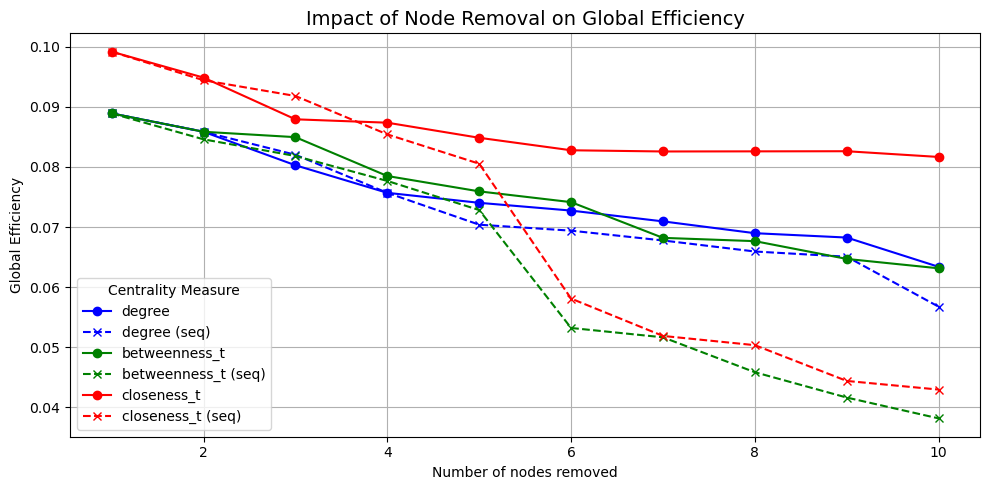

In [16]:
import matplotlib.pyplot as plt

colors = {'degree': 'blue', 'betweenness_t': 'green', 'closeness_t': 'red'}
line_styles = {'non_seq': '-', 'seq': '--'}

# 图1:节点移除对全局效率的影响
plt.figure(figsize=(10, 5))
for cent in ['degree', 'betweenness_t', 'closeness_t']:
    data_A = [r for r in results_A if r[0] == cent]
    data_C = [r for r in results_C if r[0] == cent]
    plt.plot([r[1] for r in data_A], [r[2] for r in data_A], linestyle=line_styles['non_seq'], color=colors[cent], marker='o', label=cent)
    plt.plot([r[1] for r in data_C], [r[2] for r in data_C], linestyle=line_styles['seq'], color=colors[cent], marker='x', label=cent+' (seq)')
plt.xlabel('Number of nodes removed')
plt.ylabel('Global Efficiency')
plt.legend(title='Centrality Measure')
plt.grid(True)
plt.title('Impact of Node Removal on Global Efficiency', fontsize=14)
plt.tight_layout()
plt.savefig('GE.png', dpi=300)
plt.show()

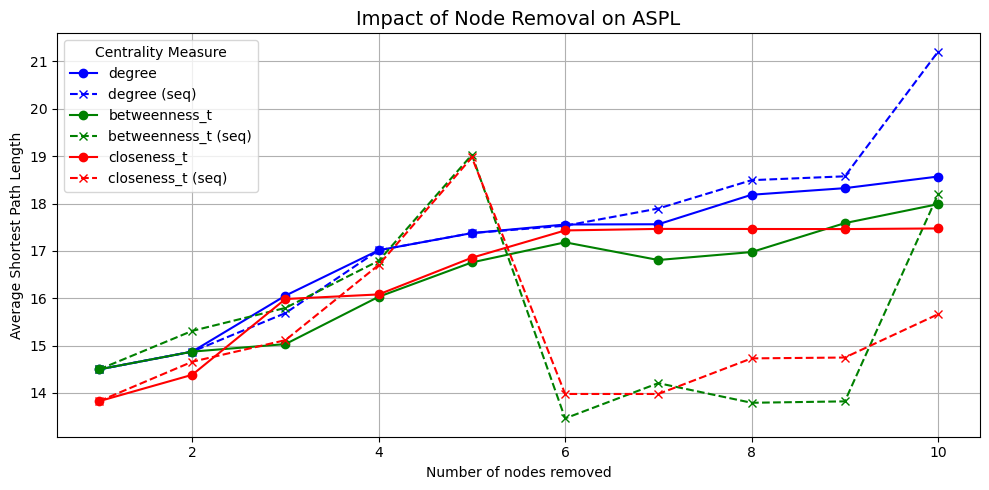

In [17]:
# 图2:节点移除对平均最短路径长度的影响
plt.figure(figsize=(10, 5))
for cent in ['degree', 'betweenness_t', 'closeness_t']:
    data_B = [r for r in results_B if r[0] == cent]
    data_D = [r for r in results_D if r[0] == cent]
    plt.plot([r[1] for r in data_B], [r[2] for r in data_B], linestyle=line_styles['non_seq'], color=colors[cent], marker='o', label=cent)
    plt.plot([r[1] for r in data_D], [r[2] for r in data_D], linestyle=line_styles['seq'], color=colors[cent], marker='x', label=cent+' (seq)')
plt.xlabel('Number of nodes removed')
plt.ylabel('Average Shortest Path Length')
plt.legend(title='Centrality Measure')
plt.grid(True)
plt.title('Impact of Node Removal on ASPL', fontsize=14)
plt.tight_layout()
plt.savefig('ASPL.png', dpi=300)
plt.show()

## 2.1 

Add weight to the flow

In [52]:
#Recompute betweenness centrality metrics with flow weighting

G2 = G.copy()

#Invert weights
for u, v, d in G2.edges(data=True):
    d['flows_inv'] =  1 / (d.get('flows', 0) + .001)

#Compute
bet_london_w = nx.betweenness_centrality(G2,weight='flows_inv',normalized=True)

#Set attributes
nx.set_node_attributes(G,bet_london_w,'betweenness_f')

df = pd.DataFrame(index=G2.nodes())
df['betweenness_f'] = pd.Series(nx.get_node_attributes(G, 'betweenness_f'))

df_sorted = df.sort_values(["betweenness_f"], ascending=False)

#Save for later
flow_betweenness_top_ten = df_sorted[0:10]

flow_betweenness_top_ten

,betweenness_f
Green Park,0.572556
Bank and Monument,0.505288
Waterloo,0.416429
Westminster,0.381366
Liverpool Street,0.336817
Stratford,0.331291
Bond Street,0.291830
Euston,0.284236
Oxford Circus,0.270764
Warren Street,0.254286


In [36]:
G3 = G.copy()

# Invert weights
for u, v, d in G3.edges(data=True):
    d['flows_inv'] = 1 / (d.get('flows', 0) + .001)

# Weighted closeness centrality with normalization
clos_w = nx.closeness_centrality(G3, distance='flows_inv', wf_improved=True)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G3, clos_w, 'closeness_w')

# To DataFrame using the nodes as the index
df1 = pd.DataFrame(index=G3.nodes())
df1['closeness_w'] = pd.Series(nx.get_node_attributes(G3, 'closeness_w'))

df_sorted = df1.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,closeness_w
Green Park,0.099996
Westminster,0.099996
Waterloo,0.099996
Bank and Monument,0.099996
Oxford Circus,0.099996
Bond Street,0.099996
Victoria,0.099996
Liverpool Street,0.099996
Warren Street,0.099996
Moorgate,0.099996


## 2.2

In [61]:
import networkx as nx

def weighted_global_efficiency(G):
    N = G.number_of_nodes()
    
    distances = dict(nx.all_pairs_dijkstra_path_length(G))
    
    sum_inverse_distances = 0
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                if j in distances[i]:
                    sum_inverse_distances += 1 / distances[i][j]
                else:
                    sum_inverse_distances += 0  # 如果节点i和j之间没有路径,则贡献为0
    
    E_glob_w = sum_inverse_distances / (N * (N - 1))
    
    return E_glob_w

In [56]:
def weighted_average_shortest_path_length(G):
 
    distances = dict(nx.all_pairs_dijkstra_path_length(G))
    
    sum_distances = 0
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                if j in distances[i]:
                    sum_distances += distances[i][j]
                else:
                    sum_distances += float('inf')  # 如果节点i和j之间没有路径,则距离为无穷大
    
    L_w = sum_distances / (N * (N - 1))
    
    return L_w

In [73]:
results_C = []

for cent, nodes in [('degree', nq_degree_nodes)]:
    print(f"Removing nodes by {cent} centrality:")
    G_new = G.copy()
    
    for i in range(3):
        node_to_remove = nodes[i]
        G_new.remove_node(node_to_remove)
        
        largest_cc = max(nx.connected_components(G_new), key=len)
        G_new_lcc = G_new.subgraph(largest_cc).copy()
        
        wge = weighted_global_efficiency(G_new_lcc)
        
        print(f"Removed node {node_to_remove}, WGE: {wge:.3f}")
        results_C.append((cent, node_to_remove, wge))  # 存储被移除节点的名称

Removing nodes by degree centrality:
Removed node Stratford, WGE: 0.098
Removed node Bank and Monument, WGE: 0.095
Removed node King's Cross St. Pancras, WGE: 0.089


In [74]:
results_D = []

for cent, nodes in [('degree', nq_degree_nodes)]:
    print(f"Removing nodes by {cent} centrality:")
    G_new = G.copy()
    
    for i in range(3):
        node_to_remove = nodes[i]
        G_new.remove_node(node_to_remove)
        
        largest_cc = max(nx.connected_components(G_new), key=len)
        G_new_lcc = G_new.subgraph(largest_cc).copy()
        
        waspl = weighted_average_shortest_path_length(G_new_lcc)
        
        print(f"Removed node {node_to_remove}, WASPL: {waspl:.3f}")
        results_D.append((cent, node_to_remove, waspl))  # 存储被移除节点的名称

Removing nodes by degree centrality:
Removed node Stratford, WASPL: 14.496
Removed node Bank and Monument, WASPL: 14.872
Removed node King's Cross St. Pancras, WASPL: 16.055


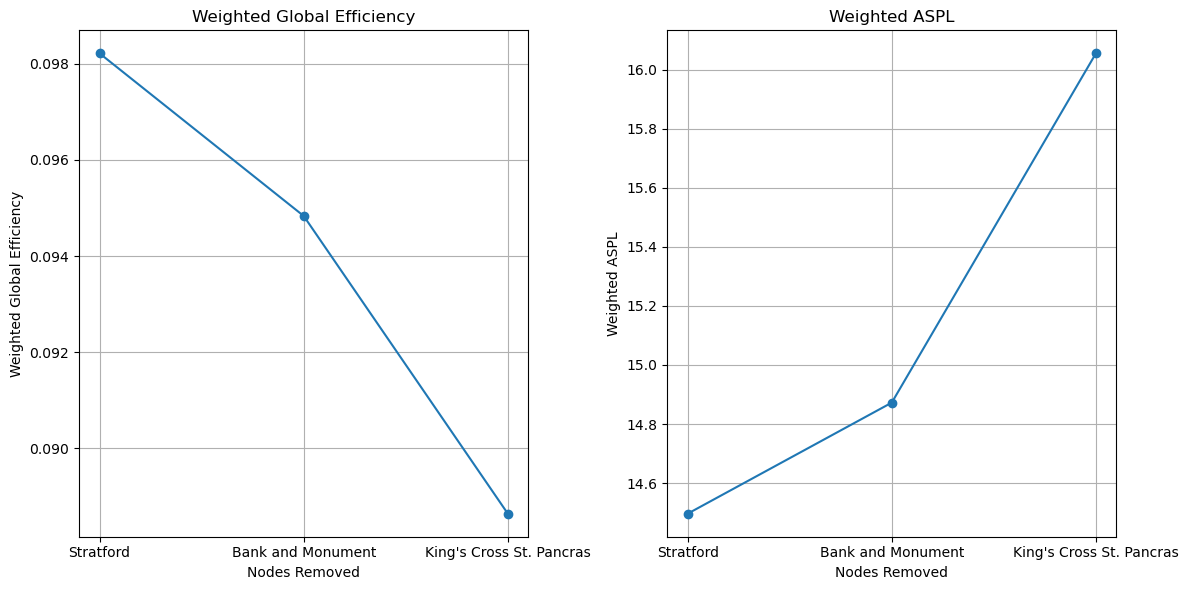

In [77]:
import matplotlib.pyplot as plt

# Extract data from results_C and results_D
centrality_measure = [result[0] for result in results_C]
nodes_removed_C = [result[1] for result in results_C]
wge_values = [result[2] for result in results_C]
nodes_removed_D = [result[1] for result in results_D]
waspl_values = [result[2] for result in results_D]

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot weighted Global Efficiency
ax1.plot(nodes_removed_C, wge_values, marker='o')
ax1.set_xlabel('Nodes Removed')
ax1.set_ylabel('Weighted Global Efficiency')
ax1.set_title('Weighted Global Efficiency')
ax1.set_xticks(range(len(nodes_removed_C)))
ax1.set_xticklabels(nodes_removed_C)
ax1.grid(True)

# Plot weighted ASPL
ax2.plot(nodes_removed_D, waspl_values, marker='o')
ax2.set_xlabel('Nodes Removed')
ax2.set_ylabel('Weighted ASPL')
ax2.set_title('Weighted ASPL')
ax2.set_xticks(range(len(nodes_removed_D)))
ax2.set_xticklabels(nodes_removed_D)
ax2.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.savefig('II.3.png', dpi=300)
plt.show()

# Part 2: Spatial Interaction models
# III. Models and Calibration
### III.1 Spatial Interaction Models

### III.2 Model Selection & Calibration 

In [19]:
#import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf

In [20]:
# flows data
data = pd.read_csv("london_flows.csv")
data.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [21]:
# check csv
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [22]:
# define r^2 and RMSE calculations
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(np.sqrt(res.mean()), 3)
    
    return RMSE

In [23]:
#Calculate log of destination employment count with small addition to solve div by zero error
data['log_dest_jobs'] = np.log(data['jobs'] + 0.001)
# apply exponential decay transformation to 'distance'
#data["exp_decay_distance"] = np.exp(-data["distance"])

#create the formula (the "-1" indicates no intercept in the regression model).
prodsim_formula_exp = 'flows ~ station_origin + log_dest_jobs + distance -1' 

#run a production constrained sim
prodsim_exp = smf.glm(formula = prodsim_formula_exp, data=data, family=sm.families.Poisson()).fit()
#print the summary
print(prodsim_exp.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    61073
Model Family:                 Poisson   Df Model:                          400
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.2195e+05
Date:                Tue, 30 Apr 2024   Deviance:                   1.6717e+06
Time:                        05:42:14   Pearson chi2:                 2.42e+06
No. Iterations:                    26   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [24]:
#create some Oi and Dj columns in the dataframe and store row and column flowss in them:
#to create O_i, take datasub ...then... group by origin ...then... summarise by calculating the sum of flows
O_i = pd.DataFrame(data.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
data = data.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(data.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
data = data.merge(D_j, on = "station_destination", how = "left" )

/tmp/ipykernel_823969/1999392237.py:3: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  O_i = pd.DataFrame(data.groupby(["station_origin"])["flows"].agg(np.sum))
/tmp/ipykernel_823969/1999392237.py:7: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  D_j = pd.DataFrame(data.groupby(["station_destination"])["flows"].agg(np.sum))


In [25]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodsim_exp.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "", regex=True)
#then once you have done this you can join them back into the dataframes
data = data.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
data.drop(columns = ["coef"], inplace = True)
#check this has worked
data.head()

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,599,78549,-2.881022
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091312,599,442,-2.881022
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499789,599,665,-2.881022
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,599,15428,-2.881022


In [26]:
alpha_i = prodsim_exp.params[:-2]
gamma = prodsim_exp.params[-2]
beta = - prodsim_exp.params[-1]
print(alpha_i)
print('The Gamma parameter:' , gamma)
print('The Beta parameter:' , beta)

station_origin[Abbey Road]         -2.881022
station_origin[Acton Central]      -1.147704
station_origin[Acton Town]         -1.600213
station_origin[Aldgate]            -2.912650
station_origin[Aldgate East]       -2.824608
                                      ...   
station_origin[Wood Street]        -0.927397
station_origin[Woodford]           -0.628676
station_origin[Woodgrange Park]    -0.881062
station_origin[Woodside Park]      -1.145098
station_origin[Woolwich Arsenal]    0.535720
Length: 399, dtype: float64
The Gamma parameter: 0.7509085100795874
The Beta parameter: 0.00015081738474355153


/tmp/ipykernel_823969/4216866947.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = prodsim_exp.params[-2]
/tmp/ipykernel_823969/4216866947.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = - prodsim_exp.params[-1]


In [27]:
data["prodsimest1"] = np.exp(data["alpha_i"]+gamma*data["log_dest_jobs"] 
                                 - data["distance"]*beta)
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
data.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,599,78549,-2.881022,77.979903
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091312,599,442,-2.881022,1.506097
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499789,599,665,-2.881022,4.180041
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022,99.274167
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,599,15428,-2.881022,55.954205
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096722,599,1208,-2.881022,4.218713
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739338,599,845,-2.881022,4.966668
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,599,1748,-2.881022,4.232938
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745238,599,850,-2.881022,3.316400
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415099,599,611,-2.881022,3.815783


In [28]:
#first round the estimates
data["prodsimest1"] = round(data["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
datamat1 = data.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
datamat1

/tmp/ipykernel_823969/2589366907.py:4: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat1 = data.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_823969/2589366907.py:4: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat1 = data.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_823969/2589366907.py:4: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep curr

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,598.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3745.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2884.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4861.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,31.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3099.0


In [29]:
CalcRSquared(data["flows"], data["prodsimest1"])

0.44827596164751926

In [30]:
CalcRMSE(data["flows"], data["prodsimest1"])

97.845

# Scenario A (Practical 3

In [31]:
# define new jobs column
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = 1/2 * row['jobs']
    else:
        val = row["jobs"]
    return val
        
data["Jobs_ScenarioA"] = data.apply(new_job, axis =1)
data.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i,prodsimest1,Jobs_ScenarioA
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,599,78549,-2.881022,78.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091312,599,442,-2.881022,2.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499789,599,665,-2.881022,4.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022,99.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,599,15428,-2.881022,56.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096722,599,1208,-2.881022,4.0,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739338,599,845,-2.881022,5.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,599,1748,-2.881022,4.0,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745238,599,850,-2.881022,3.0,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415099,599,611,-2.881022,4.0,611.0


In [32]:
# check 
data.loc[data['station_destination'] == 'Canary Wharf']

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i,prodsimest1,Jobs_ScenarioA
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022,99.0,29386.0
126,Acton Town,Canary Wharf,57,3745,58772,20398.165882,10.981421,3745,58772,-1.600213,35.0,29386.0
348,Aldgate,Canary Wharf,1,2886,58772,6564.419680,10.981421,2886,58772,-2.912650,77.0,29386.0
595,Aldgate East,Canary Wharf,3,3172,58772,5127.998899,10.981421,3172,58772,-2.824608,104.0,29386.0
817,All Saints,Canary Wharf,67,740,58772,1340.088733,10.981421,740,58772,-2.844358,181.0,29386.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60595,Wood Green,Canary Wharf,64,6667,58772,16849.246595,10.981421,6667,58772,-1.047705,105.0,29386.0
60838,Wood Lane,Canary Wharf,0,1088,58772,17092.091760,10.981421,1088,58772,-3.185043,12.0,29386.0
61062,Woodford,Canary Wharf,192,4868,58772,13963.787075,10.981421,4868,58772,-0.628676,247.0,29386.0
61294,Woodside Park,Canary Wharf,42,3093,58772,22356.567178,10.981421,3093,58772,-1.145098,42.0,29386.0


In [33]:
#calculate some new Dj^gamma and d_ij^beta values
Dj2_gamma = data["Jobs_ScenarioA"]**gamma
dist_beta = np.exp(data['distance']*(-beta))
#calcualte the first stage of the Ai values
data["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")

/tmp/ipykernel_823969/2257990744.py:7: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg(np.sum))


In [34]:
data["prodsimest2"] = data["A_i2"]*data["O_i"]*Dj2_gamma*dist_beta
#round
data["prodsimest2"] = round(data["prodsimest2"])
#check
data[["prodsimest1", "prodsimest2"]]

,prodsimest1,prodsimest2
0,78.0,84.0
1,2.0,2.0
2,4.0,4.0
3,99.0,63.0
4,56.0,60.0
...,...,...
61469,100.0,108.0
61470,296.0,320.0
61471,36.0,39.0
61472,125.0,135.0


In [35]:
#Matrix View (Code Taken from Practical 3)
datamat2 = data.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
datamat2

/tmp/ipykernel_823969/2553696429.py:2: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat2 = data.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_823969/2553696429.py:2: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat2 = data.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_823969/2553696429.py:2: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep curr

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,602.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,14.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3746.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,28.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2880.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,42.0,53.0,NaN,NaN,NaN,NaN,31.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4858.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.0
Woodside Park,NaN,NaN,2.0,20.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3098.0


# Scenario B (Practical

In [36]:
data.head()

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i,prodsimest1,Jobs_ScenarioA,Ai1,A_i2,prodsimest2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,599,78549,-2.881022,78.0,78549.0,1390.576011,0.0001,84.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091312,599,442,-2.881022,2.0,442.0,26.857420,0.0001,2.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499789,599,665,-2.881022,4.0,665.0,74.540461,0.0001,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022,99.0,29386.0,1051.967464,0.0001,63.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,599,15428,-2.881022,56.0,15428.0,997.802881,0.0001,60.0


In [37]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = cdatasub["Dj2_destsal"]**gamma
dist_beta = cdatasub["Dist"]**beta
#calcualte the first stage of the Ai values
cdatasub["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdatasub.groupby(["OrigCodeNew"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
cdatasub = cdatasub.merge(A_i, left_on="OrigCodeNew", right_index=True, how="left")

NameError: name 'cdatasub' is not defined

In [38]:
# beta change
beta_b1 = beta*1.5
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = data["jobs"]**gamma
dist_decay_b1 = np.exp(data['distance']*(-beta_b1))
#calcualte the first stage of the Ai values
data["alpha_i_partial_b1"] = Dj2_gamma * dist_decay_b1
#now do the sum over all js bit
A_i_b1 = pd.DataFrame(data.groupby(["station_origin"])["alpha_i_partial_b1"].sum())
#now divide into 1
A_i_b1["alpha_i_partial_b1"] = 1/A_i_b1["alpha_i_partial_b1"]
A_i_b1.rename(columns={"alpha_i_partial_b1":"alpha_i_sec_b1"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i_b1[["alpha_i_sec_b1"]], left_on="station_origin", right_index=True, how="left")

In [39]:
#repeat the above

beta_b2 = beta*2
dist_decay_b2 = np.exp(data['distance']*(-beta_b2))
data["alpha_i_partial_b2"] = Dj2_gamma * dist_decay_b2
A_i_b2 = pd.DataFrame(data.groupby(["station_origin"])["alpha_i_partial_b2"].sum())
A_i_b2["alpha_i_partial_b2"] = 1/A_i_b2["alpha_i_partial_b2"]
A_i_b2.rename(columns={"alpha_i_partial_b2":"alpha_i_sec_b2"}, inplace=True)
data = data.merge(A_i_b2[["alpha_i_sec_b2"]], left_on="station_origin", right_index=True, how="left")

In [40]:
#Calculate new flows for scenario b1
data["flows_scenario_b1"] = np.round(data["alpha_i_sec_b1"]*data["population"]*Dj2_gamma*dist_decay_b1)

#Calculate new flows for scenario b2
data["flows_scenario_b2"] = np.round(data["alpha_i_sec_b2"]*data["population"]*Dj2_gamma*dist_decay_b2)

data.head(50)

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i,...,Jobs_ScenarioA,Ai1,A_i2,prodsimest2,alpha_i_partial_b1,alpha_i_sec_b1,alpha_i_partial_b2,alpha_i_sec_b2,flows_scenario_b1,flows_scenario_b2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,599,78549,-2.881022,...,78549.0,1390.576011,0.000100,84.0,753.166005,0.000123,407.930978,0.000155,55.0,38.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091312,599,442,-2.881022,...,442.0,26.857420,0.000100,2.0,14.137134,0.000123,7.441466,0.000155,1.0,1.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499789,599,665,-2.881022,...,665.0,74.540461,0.000100,4.0,56.072215,0.000123,42.179687,0.000155,4.0,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022,...,29386.0,1051.967464,0.000100,63.0,1206.332683,0.000123,822.026645,0.000155,89.0,76.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,599,15428,-2.881022,...,15428.0,997.802881,0.000100,60.0,843.428862,0.000123,712.938656,0.000155,62.0,66.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096722,599,1208,-2.881022,...,1208.0,75.230123,0.000100,5.0,45.437299,0.000123,27.443105,0.000155,3.0,3.0
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739338,599,845,-2.881022,...,845.0,88.567990,0.000100,5.0,66.376504,0.000123,49.745290,0.000155,5.0,5.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,599,1748,-2.881022,...,1748.0,75.483796,0.000100,5.0,39.751601,0.000123,20.934159,0.000155,3.0,2.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745238,599,850,-2.881022,...,850.0,59.139626,0.000100,4.0,36.137247,0.000123,22.081652,0.000155,3.0,2.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415099,599,611,-2.881022,...,611.0,68.044833,0.000100,4.0,50.484924,0.000123,37.456591,0.000155,4.0,3.0


In [41]:
column_names = list(data.keys())
print(column_names)

['station_origin', 'station_destination', 'flows', 'population', 'jobs', 'distance', 'log_dest_jobs', 'O_i', 'D_j', 'alpha_i', 'prodsimest1', 'Jobs_ScenarioA', 'Ai1', 'A_i2', 'prodsimest2', 'alpha_i_partial_b1', 'alpha_i_sec_b1', 'alpha_i_partial_b2', 'alpha_i_sec_b2', 'flows_scenario_b1', 'flows_scenario_b2']


In [42]:
#Matrix View (Code Taken from Practical 3)
datamat3 = data.pivot_table(values ="flows_scenario_b1", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
datamat3

/tmp/ipykernel_823969/1031132805.py:2: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat3 = data.pivot_table(values ="flows_scenario_b1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_823969/1031132805.py:2: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat3 = data.pivot_table(values ="flows_scenario_b1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_823969/1031132805.py:2: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. 

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,597.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,8.0,8.0,NaN,20.0,0.0,NaN,11.0,...,9.0,2.0,1.0,26.0,NaN,0.0,NaN,0.0,NaN,3744.0
Aldgate,NaN,NaN,1.0,NaN,46.0,NaN,NaN,0.0,NaN,29.0,...,1.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2875.0
Aldgate East,NaN,NaN,1.0,50.0,NaN,NaN,0.0,0.0,NaN,31.0,...,1.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,3156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,36.0,51.0,NaN,NaN,NaN,NaN,23.0,...,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4861.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0
Woodside Park,NaN,NaN,1.0,16.0,15.0,NaN,0.0,NaN,NaN,32.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [43]:
#Matrix View (Code Taken from Practical 3)
datamat4 = data.pivot_table(values ="flows_scenario_b2", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
datamat4

/tmp/ipykernel_823969/400475793.py:2: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat4 = data.pivot_table(values ="flows_scenario_b2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_823969/400475793.py:2: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat4 = data.pivot_table(values ="flows_scenario_b2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_823969/400475793.py:2: FutureWarning: The provided callable <function sum at 0x7efc3c1a5f80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To 

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1222.0
Acton Town,NaN,NaN,NaN,4.0,4.0,NaN,26.0,0.0,NaN,6.0,...,5.0,1.0,0.0,30.0,NaN,0.0,NaN,0.0,NaN,3739.0
Aldgate,NaN,NaN,0.0,NaN,55.0,NaN,NaN,0.0,NaN,30.0,...,0.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2880.0
Aldgate East,NaN,NaN,0.0,60.0,NaN,NaN,0.0,0.0,NaN,31.0,...,0.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,3169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,26.0,41.0,NaN,NaN,NaN,NaN,14.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4864.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0
Woodside Park,NaN,NaN,0.0,11.0,10.0,NaN,0.0,NaN,NaN,28.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3087.0


In [44]:
data['prodsimest2'].describe()

count    61474.000000
mean        25.075756
std         80.028712
min          0.000000
25%          1.000000
50%          6.000000
75%         20.000000
max       3562.000000
Name: prodsimest2, dtype: float64

In [45]:
data['flows_scenario_b1'].describe()

count    61474.000000
mean        25.067183
std         90.928703
min          0.000000
25%          1.000000
50%          4.000000
75%         17.000000
max       3897.000000
Name: flows_scenario_b1, dtype: float64

In [46]:
data['flows_scenario_b2'].describe()

count    61474.000000
mean        25.066256
std        102.730137
min          0.000000
25%          0.000000
50%          2.000000
75%         13.000000
max       4139.000000
Name: flows_scenario_b2, dtype: float64

# Analysis

# Analysis

### Compare with the Frobenius norm and others

In [47]:
# Replace NAs to 0
df1 = datamat1.fillna(0)  #Production constrained model
df2 = datamat2.fillna(0)  #Scenario A
df3 = datamat3.fillna(0)  #Scenario B1
df4 = datamat4.fillna(0)  #Scenario B2

In [48]:
# Convert the df to array
dm1_array = np.array(datamat1)
dm2_array = np.array(datamat2)
dm3_array = np.array(datamat3)
dm4_array = np.array(datamat4)

In [49]:
# Convert the df to array
datamat1_array = np.array(df1)
datamat2_array = np.array(df2)
datamat3_array = np.array(df3)
datamat4_array = np.array(df4)

In [50]:
# 计算Scenario A, B1, B2与Production Constrained model之间的Frobenius范数差异
fro_norm_A = np.linalg.norm(datamat2_array - datamat1_array, 'fro')
fro_norm_B1 = np.linalg.norm(datamat3_array - datamat1_array, 'fro')
fro_norm_B2 = np.linalg.norm(datamat4_array - datamat1_array, 'fro')

print(f"Frobenius norm difference between Scenario A and Production Constrained model: {fro_norm_A}")
print(f"Frobenius norm difference between Scenario B1 and Production Constrained model: {fro_norm_B1}")
print(f"Frobenius norm difference between Scenario B2 and Production Constrained model: {fro_norm_B2}")

Frobenius norm difference between Scenario A and Production Constrained model: 18789.38423685034
Frobenius norm difference between Scenario B1 and Production Constrained model: 9072.542091387617
Frobenius norm difference between Scenario B2 and Production Constrained model: 20271.032040821206


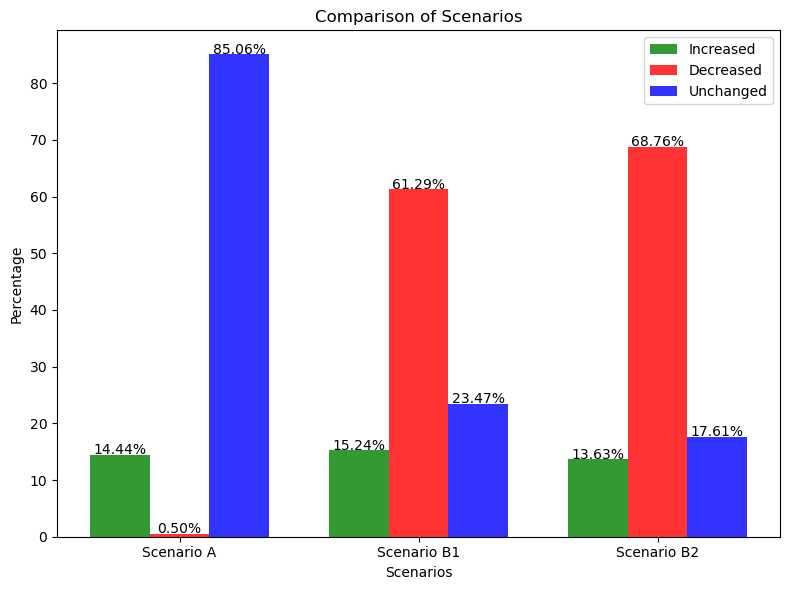

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def compare_scenarios(scenario_matrix, prod_matrix):
    # 确保输入的矩阵是numpy数组
    scenario_matrix = np.array(scenario_matrix)
    prod_matrix = np.array(prod_matrix)
    
    # 移除最后一行和最后一列
    scenario_matrix = scenario_matrix[:-1, :-1]
    prod_matrix = prod_matrix[:-1, :-1]
    
    # 计算差异矩阵
    diff_matrix = scenario_matrix - prod_matrix
    
    increased_sites = np.sum(diff_matrix > 0)
    decreased_sites = np.sum(diff_matrix < 0)
    unchanged_sites = np.sum(diff_matrix == 0)
    
    # 计算总站点数
    total_sites = increased_sites + decreased_sites + unchanged_sites
    
    increased_percentage = increased_sites / total_sites * 100
    decreased_percentage = decreased_sites / total_sites * 100
    unchanged_percentage = unchanged_sites / total_sites * 100
    
    return increased_percentage, decreased_percentage, unchanged_percentage


# 进行比较
increased_A, decreased_A, unchanged_A = compare_scenarios(datamat2, datamat1)
increased_B1, decreased_B1, unchanged_B1 = compare_scenarios(datamat3, datamat1)
increased_B2, decreased_B2, unchanged_B2 = compare_scenarios(datamat4, datamat1)

# 可视化结果
scenarios = ['Scenario A', 'Scenario B1', 'Scenario B2']
increased_percentages = [increased_A, increased_B1, increased_B2]
decreased_percentages = [decreased_A, decreased_B1, decreased_B2]
unchanged_percentages = [unchanged_A, unchanged_B1, unchanged_B2]

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.25
opacity = 0.8
index = np.arange(len(scenarios))

rects1 = ax.bar(index, increased_percentages, bar_width, alpha=opacity, color='g', label='Increased')
rects2 = ax.bar(index + bar_width, decreased_percentages, bar_width, alpha=opacity, color='r', label='Decreased')
rects3 = ax.bar(index + 2*bar_width, unchanged_percentages, bar_width, alpha=opacity, color='b', label='Unchanged')

for i, v in enumerate(increased_percentages):
    ax.text(i, v + 0.1, f"{v:.2f}%", ha='center', fontsize=10)
for i, v in enumerate(decreased_percentages):
    ax.text(i + bar_width, v + 0.1, f"{v:.2f}%", ha='center', fontsize=10)
for i, v in enumerate(unchanged_percentages):
    ax.text(i + 2*bar_width, v + 0.1, f"{v:.2f}%", ha='center', fontsize=10)

ax.set_xlabel('Scenarios')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Scenarios')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(scenarios)
ax.legend()

fig.tight_layout()
plt.savefig('scenario_comparison.png', dpi=300)  # Save the figure to a file
plt.show()

In [52]:
import numpy as np

def calculate_changes(scenario_matrix, prod_matrix):
    # 确保输入的矩阵是numpy数组
    scenario_matrix = np.array(scenario_matrix)
    prod_matrix = np.array(prod_matrix)
    
    # 计算差异矩阵
    diff_matrix = scenario_matrix - prod_matrix
    
    return diff_matrix

# 计算每个Scenario的变化差异
scenario_changes = [
    calculate_changes(datamat2, datamat1), 
    calculate_changes(datamat3, datamat1), 
    calculate_changes(datamat4, datamat1)
]

# 计算每个Scenario的Average absolute change和Total absolute change
scenarios = ['Scenario A', 'Scenario B1', 'Scenario B2']
for i, scenario in enumerate(scenarios):
    changes = np.abs(scenario_changes[i])  # 计算变化的绝对值
    average_change = np.nanmean(changes)  # 计算平均绝对变化
    total_change = np.nansum(changes)     # 计算总绝对变化

    print(f"{scenario}:")
    print(f"Average absolute change: {average_change:.2f}")
    print(f"Total absolute change: {total_change:.2f}")
    print()

Scenario A:
Average absolute change: 1.20
Total absolute change: 74612.00

Scenario B1:
Average absolute change: 7.09
Total absolute change: 441252.00

Scenario B2:
Average absolute change: 14.38
Total absolute change: 895204.00

